In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv('Black_friday_sales1.csv')

In [5]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

Create a dataset

In [7]:
np.random.seed(0)
x = np.random.randn(10)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

In [8]:
min(x)

-0.977277879876411

In [9]:
max(x)

2.240893199201458

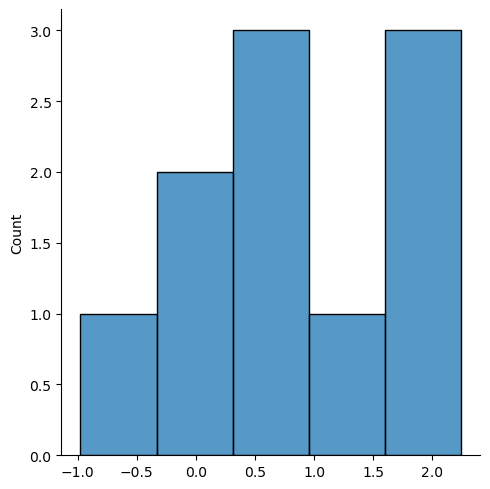

In [10]:
ax = sns.displot(x)

KDE PLOT

A KDE plot is a non-parametric method used to estimate the probability density function (PDF) of a variable. Non-parametric means that it doesn't rely on assumptions about the shape of the underlying distribution. Instead, it allows us to visualize the likelihood of different values for a continuous random variable within a specific range.

In simpler terms, a KDE plot shows the likelihood of different values occurring for a variable, without making any assumptions about the exact shape of the distribution. It's like a smoothed histogram that helps us understand the probability of different values being observed.

In [11]:
tips = sns.load_dataset("tips")

<Axes: xlabel='total_bill', ylabel='Density'>

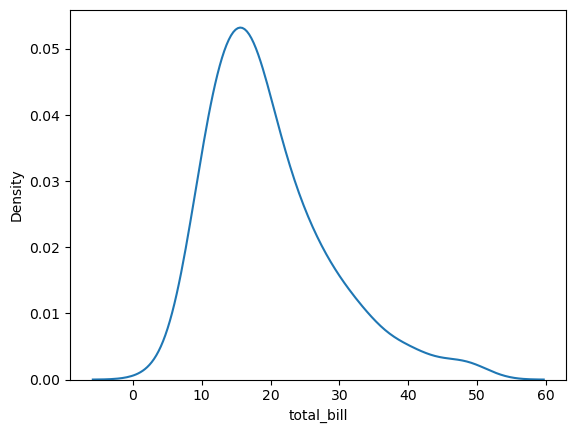

In [13]:
sns.kdeplot(data=tips, x="total_bill")

In [14]:
iris = sns.load_dataset("iris")

<Axes: ylabel='Density'>

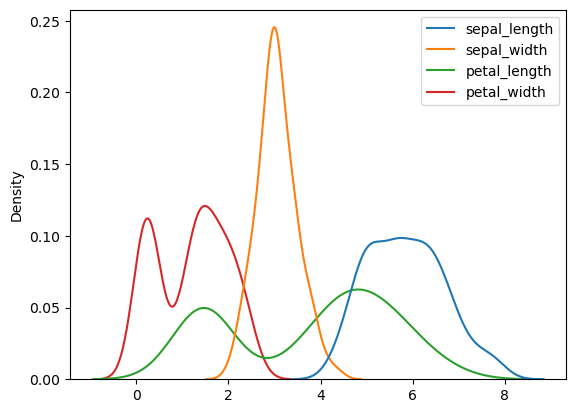

In [15]:
sns.kdeplot(data=iris)

<Axes: xlabel='total_bill', ylabel='Density'>

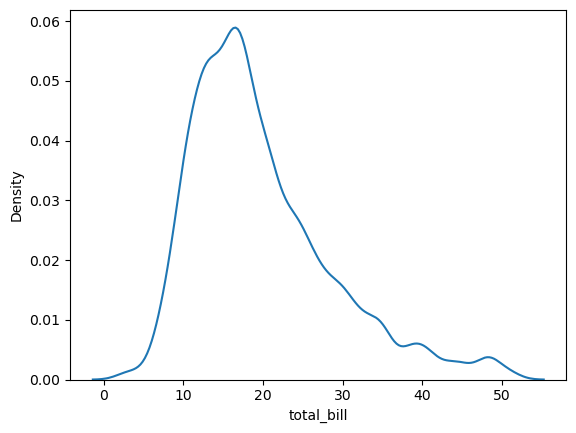

In [17]:
sns.kdeplot(data=tips, x="total_bill", bw_adjust=.5)

<Axes: xlabel='total_bill', ylabel='Density'>

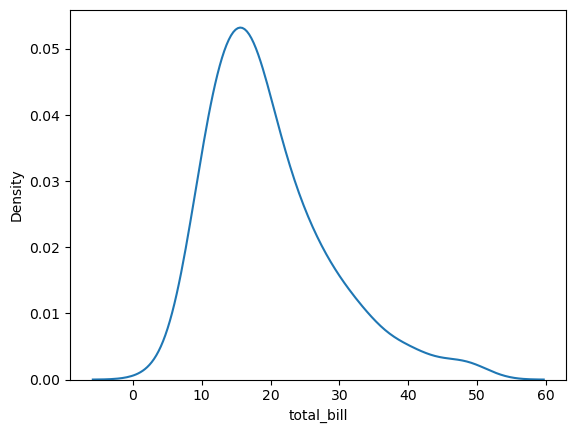

In [19]:
sns.kdeplot(data=tips,x="total_bill",bw_adjust=1, cut=3)

<Axes: xlabel='total_bill', ylabel='Density'>

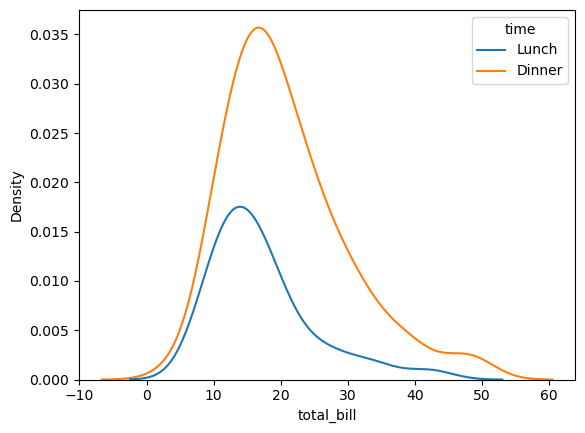

In [20]:
#Hue: for separating datasets
sns.kdeplot(data=tips, x="total_bill", hue="time")

<Axes: xlabel='total_bill', ylabel='Density'>

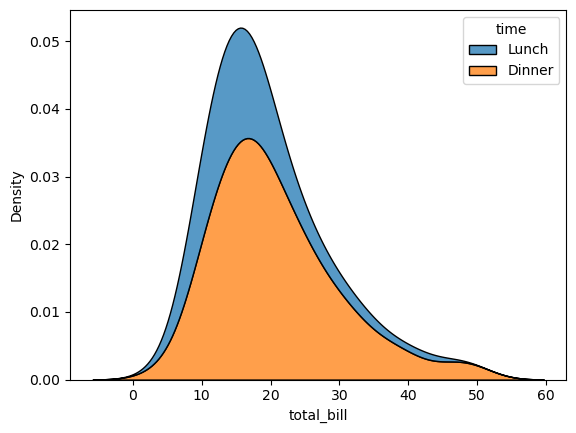

In [22]:
# to stack datapoints over each other
sns.kdeplot(data=tips, x="total_bill",hue="time", multiple="stack")

In [23]:
#Group data and find the kdeplot
tips_agg = (tips.groupby("size").agg(total_bill=("total_bill", "mean"), n= ("total_bill","count")))

AttributeError: Line2D.set() got an unexpected keyword argument 'weight'

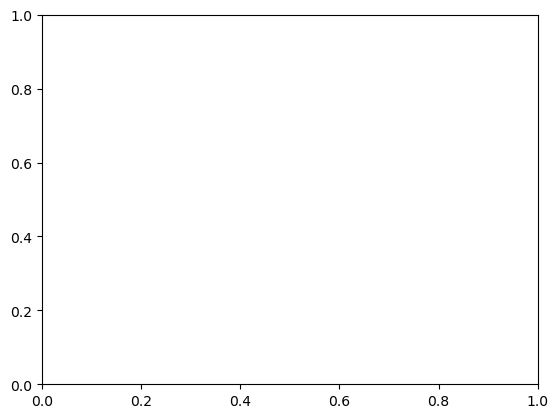

In [25]:
sns.kdeplot(data=tips_agg, x="total_bill", weight ="n")

<Axes: xlabel='total_bill', ylabel='Density'>

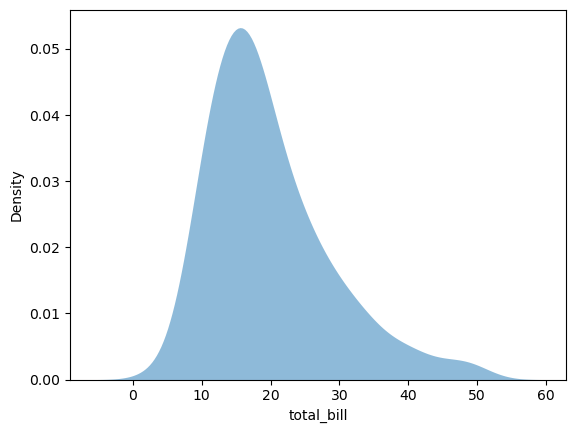

In [29]:
sns.kdeplot(data=tips, x="total_bill", fill=True, alpha=.5, linewidth= 0)

Bivariant KDE plot

In [30]:
geyser = sns.load_dataset("geyser")

<Axes: xlabel='waiting', ylabel='duration'>

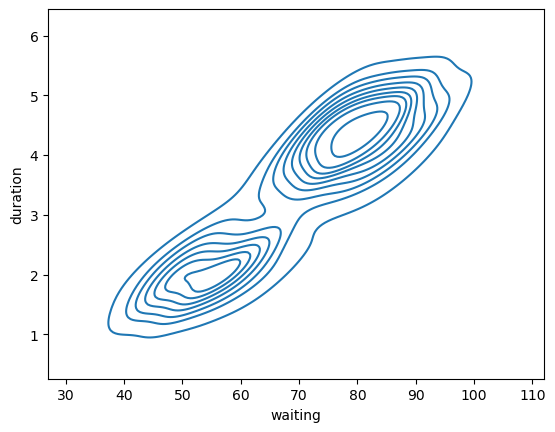

In [31]:
sns.kdeplot(data=geyser,x = "waiting", y="duration")

ScatterPlots

<Axes: xlabel='total_bill', ylabel='tip'>

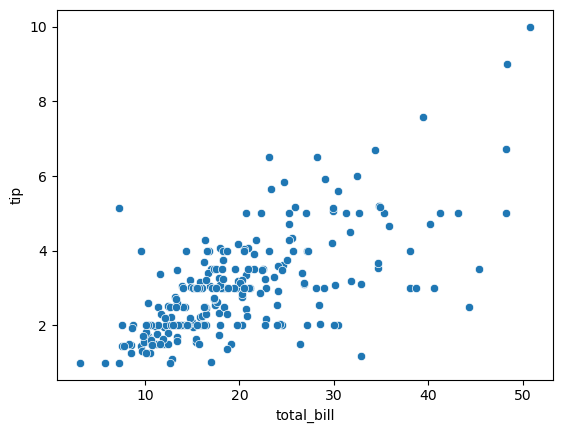

In [33]:
sns.scatterplot(data=tips, x="total_bill", y="tip")

Features(Themes) of sns library

sns.set_theme(style="whitegrid")

sns.set_theme(style="ticks")

sns.set_theme(style="darkgrid")



<Axes: xlabel='total_bill', ylabel='tip'>

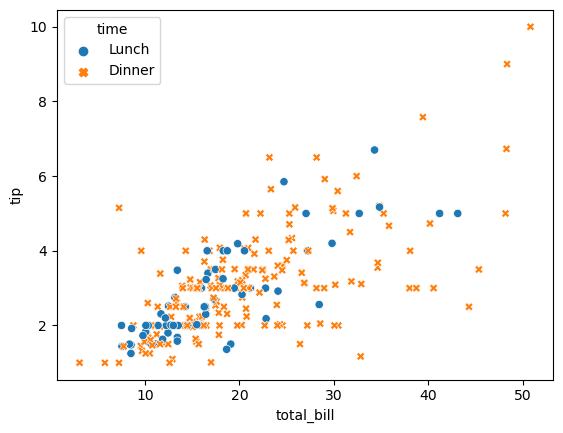

In [34]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time", style="time")

<Axes: xlabel='total_bill', ylabel='tip'>

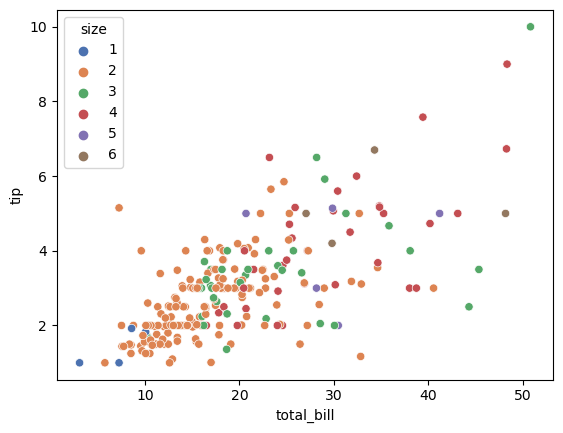

In [35]:
sns.scatterplot(data=tips, x="total_bill", y="tip",hue="size", palette="deep")

In [36]:
tip_rate = tips.eval("tip/total_bill").rename("tip_rate")

In [37]:
sns.kdeplot(data=tips, x="total_bill",y="tip", hue="tip_rate")

ValueError: Could not interpret value `tip_rate` for parameter `hue`

c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'size'
  cset = contour_func(


<Axes: xlabel='total_bill', ylabel='tip'>

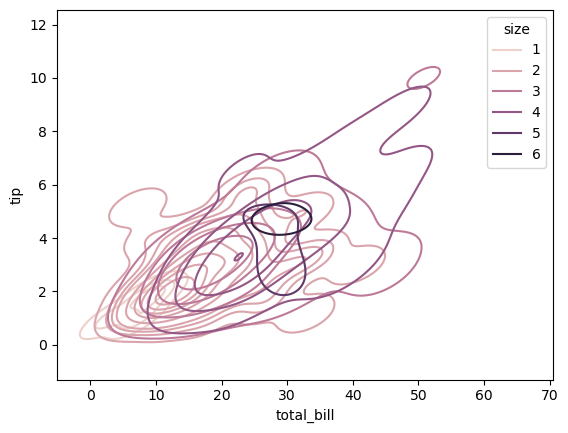

In [38]:
sns.kdeplot(data=tips, x="total_bill",y="tip",hue="size", size="size")

In [41]:
# Assign symbols to represent the points
markers ={"lunch":"S", "Dinner": "x"}

In [ ]:
sns.scatterplot(data =tips, x="total_bill",y="tip", style="time", markers=markers)

Rug Plot

Used to show the points on a single axis

Can be combined with other plot types

<Axes: xlabel='total_bill', ylabel='Density'>

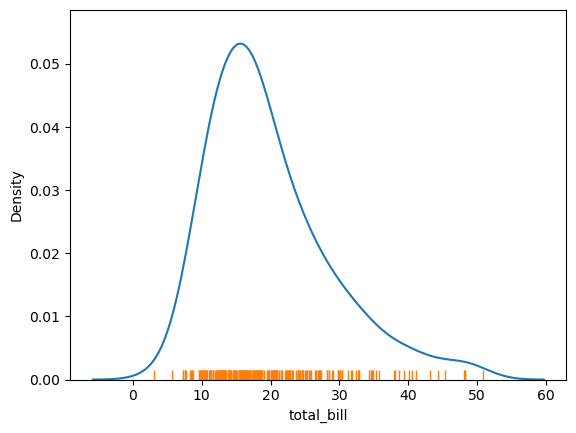

In [43]:
# add along one axis
sns.kdeplot(data=tips, x="total_bill")
sns.rugplot(data=tips, x = "total_bill")

<Axes: xlabel='total_bill', ylabel='tip'>

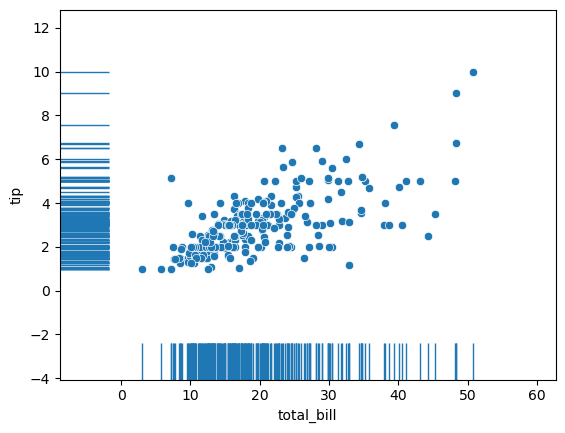

In [44]:
#along both axes
sns.scatterplot(data=tips, x="total_bill",y="tip")
sns.rugplot(data=tips, x="total_bill",y="tip", height =.1)

<Axes: xlabel='total_bill', ylabel='tip'>

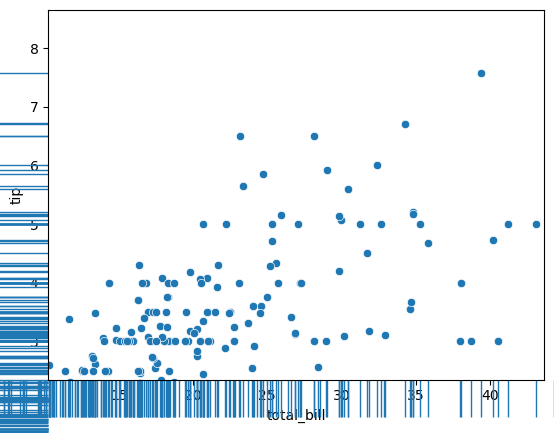

In [46]:
#Flip the points of the ruglot outside the plot
sns.scatterplot(data=tips, x="total_bill",y="tip")
sns.rugplot(data=tips, x="total_bill",y="tip", height =-.1, clip_on=False)

In [49]:
# show the density of a larger dataset using thinner lines and alpha blending
diamonds = sns.load_dataset('diamonds')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<Axes: xlabel='carat', ylabel='price'>

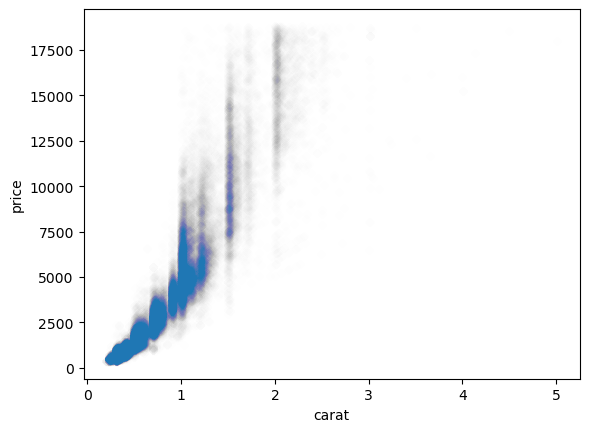

In [50]:
sns.scatterplot(data=diamonds, x="carat",y="price",lw = 1, alpha= .005 )

Joint Plot

In [52]:
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


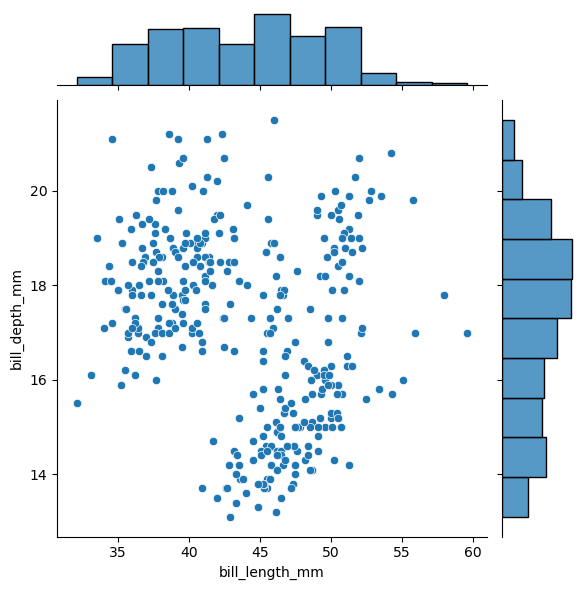

In [53]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

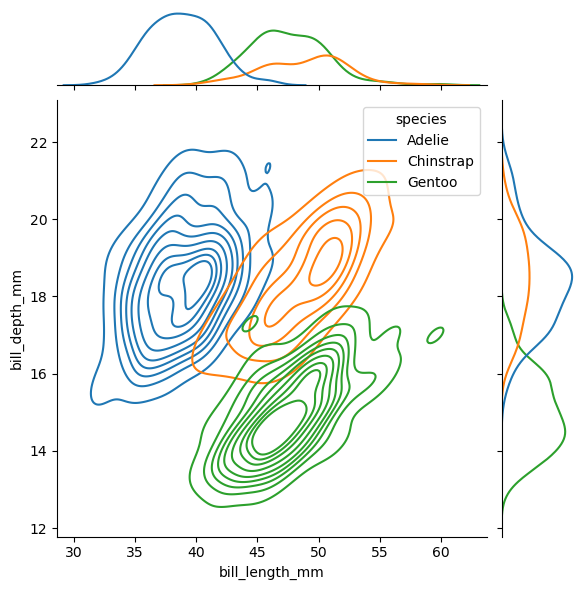

In [54]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

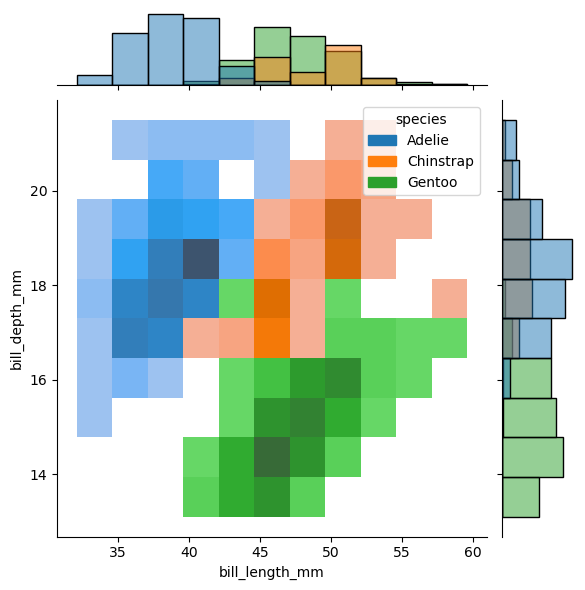

In [61]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species",kind="hist")

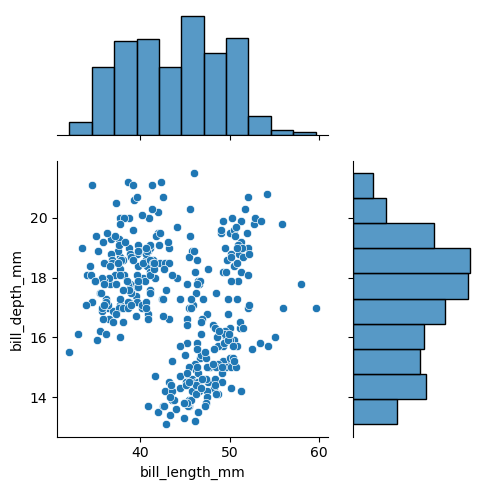

In [62]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", height=5,ratio=2, marginal_ticks=False) #heigh is X5 of breadth


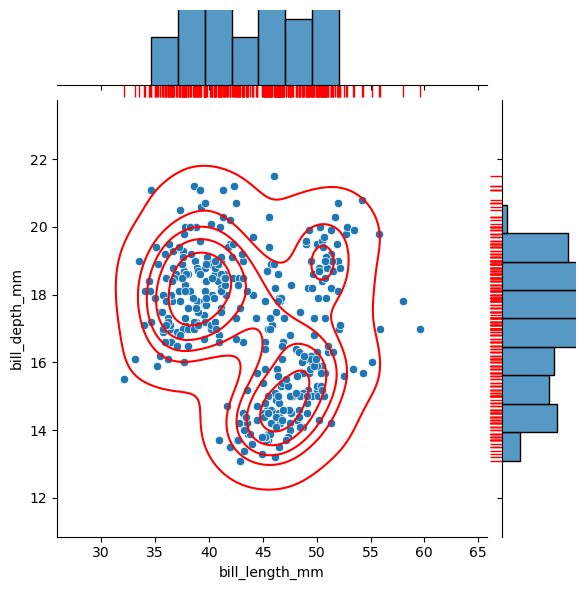

In [63]:
# more than 2 plots in a joint plot
g = sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.kdeplot,color='r', levels=6)   #levels= the number of circles we want to see
g.plot_marginals(sns.rugplot,color='r', height=-.15,clip_on=False)

Pair Plot

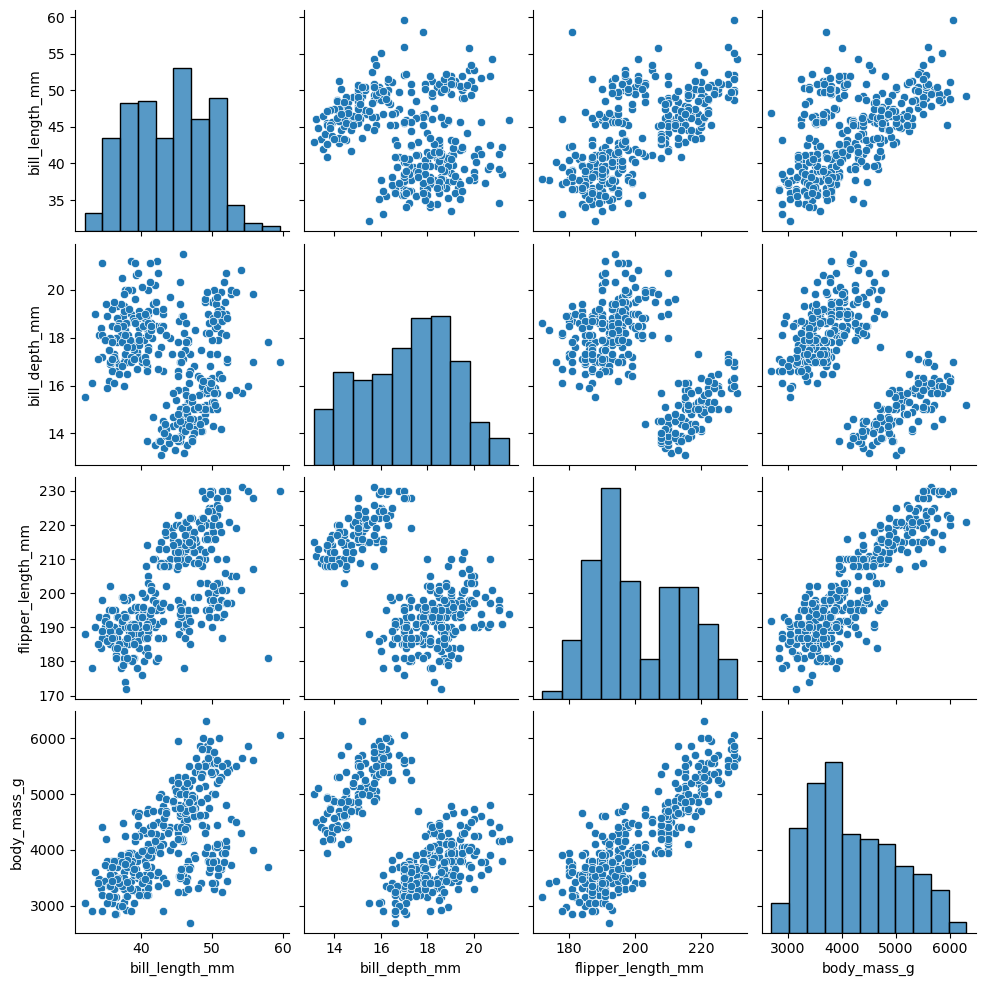

In [64]:
sns.pairplot(penguins)

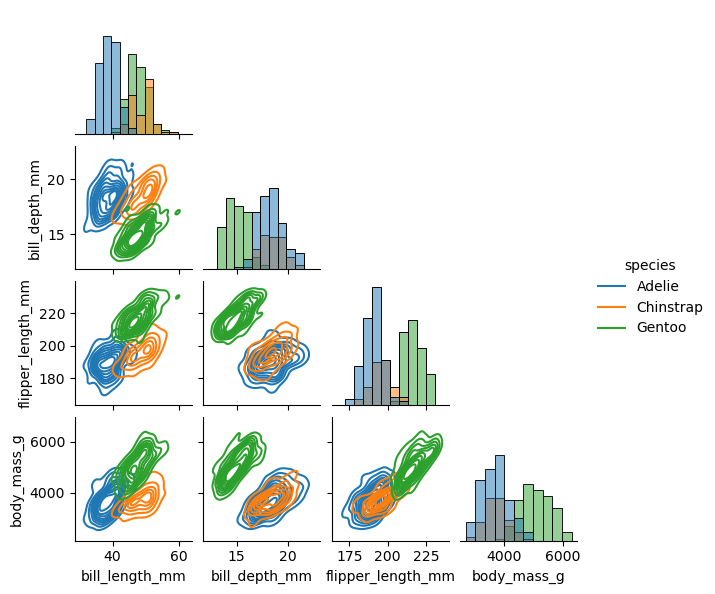

In [65]:
sns.pairplot(penguins,hue="species",diag_kind="hist", kind="kde", height=1.5, corner=True) #corner shows only required plots

Bar Plot

<Axes: >

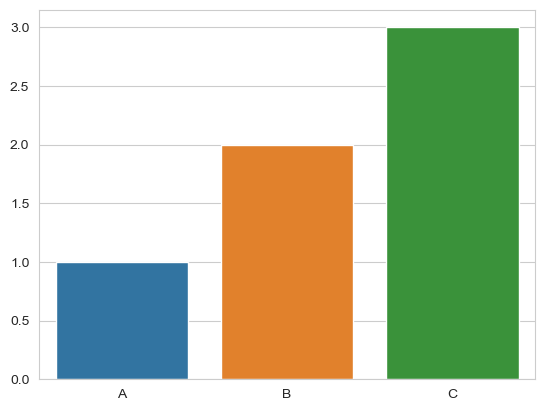

In [67]:
# call the style function  to set the default for all plots
sns.set_style("whitegrid")
sns.barplot(x=["A","B","C"], y=[1,2,3])

In [68]:
#override seaborn's default parameter value
sns.set_style("darkgrid",{"grid_color":.6, "grid.linestyle": ":"})

<Axes: >

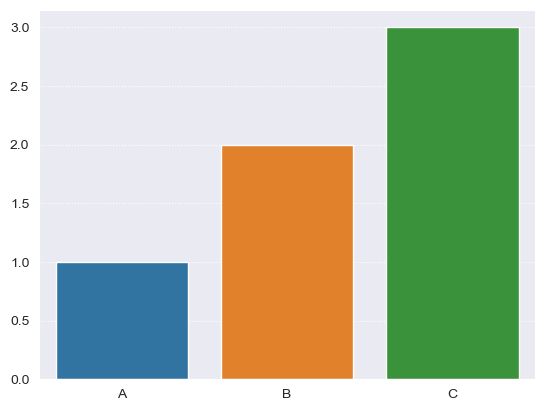

In [69]:
sns.barplot(x=["A","B","C"], y=[1,2,3])

In [70]:
# draw a set of vertical bar plots by a categorical variable
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


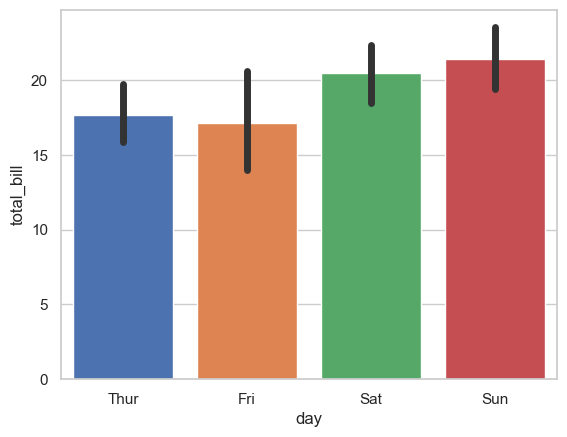

In [74]:
ax= sns.barplot(x ="day",y="total_bill",data=tips, saturation=1,errcolor=".2",errwidth=5, capsize=0) #blackline = confidence interval